In [38]:
import ccxt
import pandas as pd
from get_best_fr import get_best_fr
import matplotlib.pyplot as plt
ftx=ccxt.ftx({
            "apiKey":'apiKey',
            "secret":'secretKey',
            'headers':{
                'FTX-SUBACCOUNT':'subaccountName'
            }
        })
tf='1h'
(lower,higher)=get_best_fr()

In [39]:
low_symbols=lower['symbol'].to_list()
high_symbols=higher['symbol'].to_list()
low_symbols

['MASK/USD:USD', 'BAND/USD:USD', 'AXS/USD:USD', 'AVAX/USD:USD', 'ETC/USD:USD']

In [40]:
for i,symbol in enumerate(low_symbols):
    low_symbols[i]=low_symbols[i].replace('/USD:USD','-PERP')
low_symbols

['MASK-PERP', 'BAND-PERP', 'AXS-PERP', 'AVAX-PERP', 'ETC-PERP']

In [41]:
for i,symbol in enumerate(high_symbols):
    high_symbols[i]=high_symbols[i].replace('/USD:USD','-PERP')
high_symbols

['KSHIB-PERP', 'OP-PERP', 'FLOW-PERP', 'INJ-PERP', 'ALGO-PERP']

In [42]:
from datetime import datetime,timedelta
onehago=datetime.now()-timedelta(hours=8)
onehago=onehago.timestamp()*1000
low_symbols.extend(high_symbols)
dfs=[]
for symbol in low_symbols:
    df=ftx.fetch_ohlcv(symbol,timeframe='1m',since=onehago,limit=4*60)
    df=pd.DataFrame(df)
    df.columns=['timestamp','open','high','low','close','volume']
    df['timestamp']=[datetime.fromtimestamp((x/1000)) for x in df['timestamp']]
    df=df.set_index('timestamp')
    dfs.append(df)

In [43]:
low_df=dfs[0:5]
high_df=dfs[5:10]

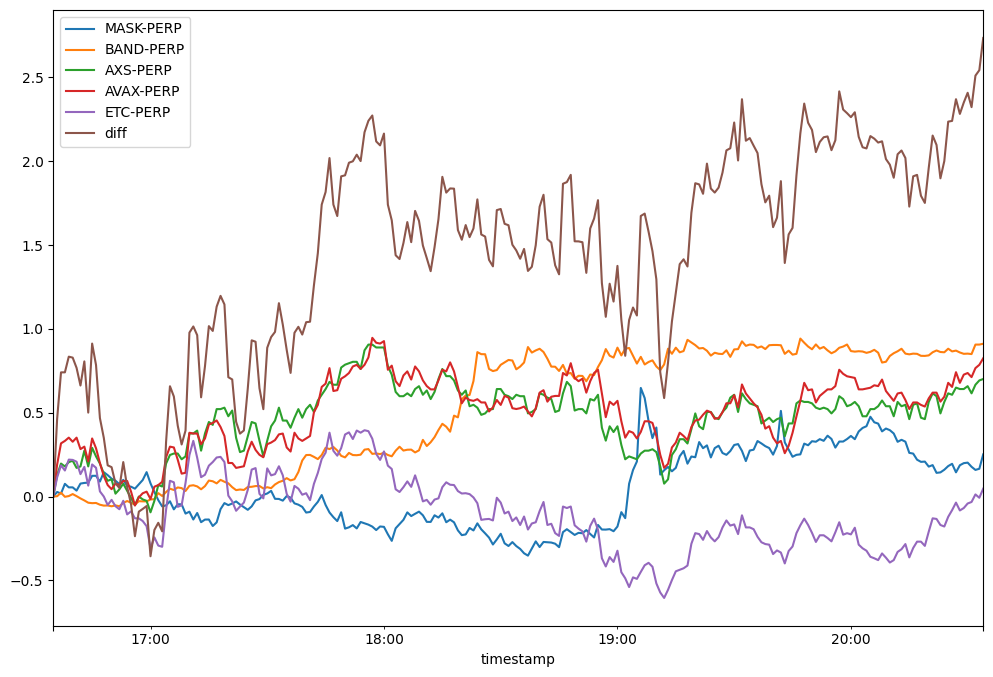

In [44]:
plt.figure(figsize=(12,8))
for idx,i in enumerate(low_df):
    i['close']=(i['close']-i['close'].min())/(i['close'].max()-i['close'].min())
    i['close']=i['close']-i['close'][0]
    i['close'].plot(label=f'{low_symbols[idx]}')
df_dif=pd.DataFrame()
df_dif['close']=low_df[0]['close']
for i in range(1,5):
    df_dif['close']+=low_df[i]['close']
df_dif['close'].plot(label='diff')
plt.legend()
plt.show()

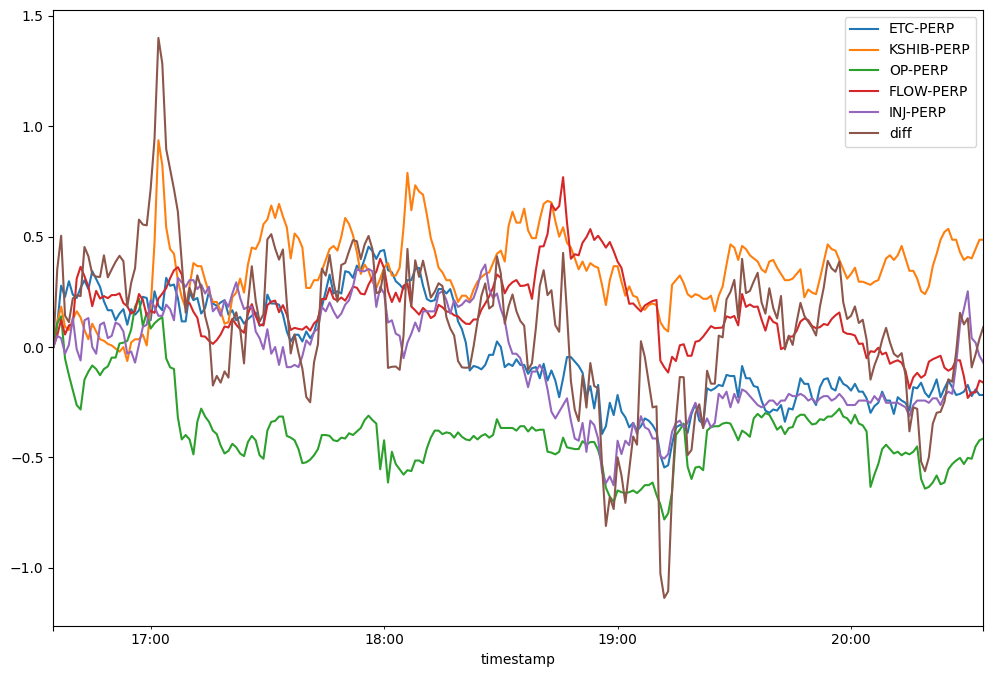

In [45]:
plt.figure(figsize=(12,8))
for idx,i in enumerate(high_df):
    i['close']=(i['close']-i['close'].min())/(i['close'].max()-i['close'].min())
    i['close']=i['close']-i['close'][0]
    i['close'].plot(label=f'{low_symbols[idx+4]}')
df_dif2=pd.DataFrame()
df_dif2['close']=low_df[0]['close']
for i in range(1,5):
    df_dif2['close']+=high_df[i]['close']
df_dif2['close'].plot(label='diff')
plt.legend()
plt.show()

In [46]:
df_dif.max()

close    2.734642
dtype: float64

In [47]:
df_dif2.min()

close   -1.136276
dtype: float64